## Regressão Linear

A predição por regressão linear é uma abordagem que procura estimar uma reta a partir do relacionamento de duas variáveis ou mais.
Essa relação é representada por uma equação e que a predição é calcuada pela soma ponderada dos atributos (*features*), mais uma constante chamada viés (*bias*), também chamado de constante (*intercept*).

#### Passo 1: Instalar bibliotecas
Este exemplo utiliza a biblioteca scikit-learn, uma das bibliotecas mais populares para machine learning em Python

In [11]:
#!pip install matplotlib
#!pip install numpy
#!pip install scikit-learn

#### Passo 2: Importar as bibliotecas

Importa as bibliotecas necessárias como numpy para manipulação de arrays, matplotlib para visualização, e scikit-learn para a construção do modelo de regressão linear.

In [272]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

#### Passo 3: Gerar dados de exemplo
Criar um conjunto de dados aleatórios para treinar o modelo

In [273]:
np.random.seed(25)
X = 5 * np.random.rand(100, 1)
y = 2 * X + np.random.randn(100, 1)

Visualização do conjunto de dados

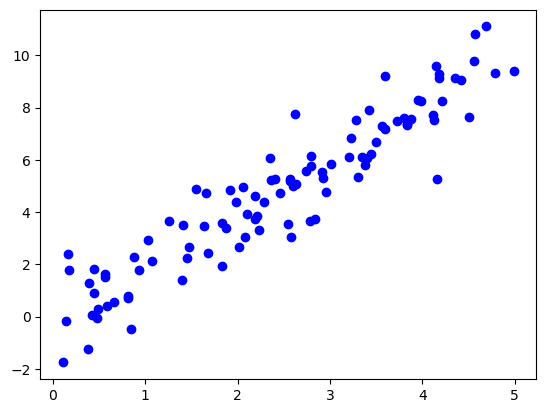

In [274]:
plt.scatter(X, y, color='blue')
plt.show()

#### Passo 4: Dividir os dados em conjuntos de treinamento e teste

Usar a função do Scikit-Learn [`sklearn.model_selection.train_test_split()`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)

##### Argumentos:

* matriz a ser dividida - `X` ou `y`
* `test_size` - `float` ou `int` do tamanho do dataset de teste (padrão $0.25$)
* `train_size` - padrão `1 - test_size`
* `random_state` - `int` - seed do gerador de número randômicos (replicabilidade)

In [275]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [276]:
print(f"Tamanho de X_train: {X_train.shape}")
print(f"Tamanho de X_test: {X_test.shape}")
print(f"Tamanho de y_train: {y_train.shape}")
print(f"Tamanho de y_test: {y_test.shape}")

Tamanho de X_train: (80, 1)
Tamanho de X_test: (20, 1)
Tamanho de y_train: (80, 1)
Tamanho de y_test: (20, 1)


#### Passo 4: Criar o modelo de regressão linear

Usar o estimador do Scikit-Learn [`sklearn.linear_model.LinearRegression()`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)

##### Retorna:
* Objeto `estimator` do Scikit-Learn

In [277]:
model = LinearRegression()

##### Classe `Estimators`

* `.fit()` - Treina o Modelo
    * `X` - Dados de treinamento
    * `y` - Valores alvo
* `.predict()` - Gera predições do modelo
    * `X`
* `.coef_` - Retorna os coeficientes do modelo ($\theta_i$)
* `.intercept_` - Retorna o viés/constante (*bias/intercept*) do modelo ($\theta_0$)

#### Passo 5: Treinar o modelo

In [278]:
model.fit(X_train, y_train)

LinearRegression()

#### Passo 6: Fazer previsões no conjunto de teste

In [280]:
y_pred = model.predict(X_test)

#### Passo 7: Avaliar modelo

Ao treinar um modelo de regressão linear, estamos interessados em obter o valor de $\theta$ que minimize a função de custo.

##### *Mean Squared Error* (MSE) - Erro Quadrático Médio
Uma função de custo tipicamente utilizada em problemas de regressão é o **MSE**:

$$MSE = \frac{1}{m}\Sigma_{i=1}^{m}{(\hat{y}_i - y_i)^2}$$

O Erro Quadrático Médio nos informa a que distância a reta de regressão está do conjunto de dados. Calculando o erro (distância entre os pontos e a reta) e elevando ao quadrado (para remover sinais negativos), dando maior peso para grandes erros. A reta com o melhor ajuste possível é a que fornece o menor erro quadrático médio.

##### *Mean Absolute Error* (MAE) - Erro Absoluto Médio
Para encontrar o erro médio absoluto basta somar a distancia dos pontos até a reta e depois dividir pelo mesmo número de pontos

$$MAE = \frac{1}{m}\Sigma_{i=1}^{m}{|\hat{y}_i - y_i|}$$

In [281]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print("Erro Quadrático Médio (MSE):", mse)
print("Erro Absoluto Médio (MAE):", mae)
print("Coeficiente:", model.coef_)
print("Intercepto:", model.intercept_)

Erro Quadrático Médio (MSE): 0.9554845869974121
Erro Absoluto Médio (MAE): 0.8142759213148608
Coeficiente: [[2.07316809]]
Intercepto: [-0.25275939]


#### Passo 8: Visualizar os resultados

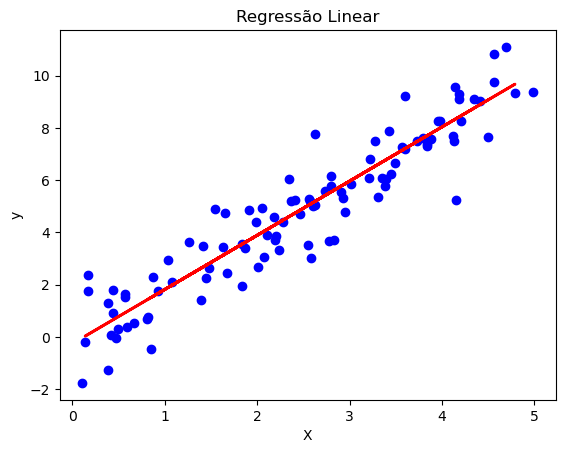

In [282]:
plt.scatter(X, y, color='blue')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.title("Regressão Linear")
plt.xlabel("X")
plt.ylabel("y")
plt.show()